In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from subprocess import check_output
from datetime import time

In [2]:
df = pd.read_csv("merge2.csv")
df.head()

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictions
0,0,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,98494.0,...,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112,681
1,1,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,85444.0,...,0.509,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843,0
2,2,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,136162.0,...,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741,29
3,3,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,70062.0,...,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072,841
4,4,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,187066.0,...,0.487,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877,2


In [3]:
df.drop(["row_id","county_code","state"], axis=1, inplace=True)
#df.pct_adult_smoking = df.pct_adult_smoking.fillna(df.pct_adult_smoking.mean())
#df.pct_low_birthweight = df.pct_low_birthweight.fillna(df.pct_low_birthweight.mean())
#df.pct_excessive_drinking = df.pct_excessive_drinking.fillna(df.pct_excessive_drinking.mean())
#df.homicides_per_100k = df.homicides_per_100k.fillna(df.homicides_per_100k.mean())
#df.motor_vehicle_crash_deaths_per_100k = df.motor_vehicle_crash_deaths_per_100k.fillna(df.motor_vehicle_crash_deaths_per_100k.mean())
#df.pop_per_dentist = df.pop_per_dentist.fillna(df.pop_per_dentist.mean())
#df.pop_per_primary_care_physician = df.pop_per_primary_care_physician.fillna(df.pop_per_primary_care_physician.mean())
#df.median_property_value = df.median_property_value.fillna(df.median_property_value.median())
#df.median_household_income = df.median_household_income.fillna(df.median_household_income.median())
#df.air_pollution_particulate_matter_value = df.air_pollution_particulate_matter_value.fillna(df.air_pollution_particulate_matter_value.median())

#df.drop(["pct_adult_smoking","pct_low_birthweight","pct_excessive_drinking","homicides_per_100k","motor_vehicle_crash_deaths_per_100k","pop_per_dentist","pop_per_primary_care_physician"], axis=1, inplace=True)

columns = ["rucc", "urban_influence", "economic_typology","year"]
df = pd.get_dummies(df, columns=columns)
df.head(10)

,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,...,"urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",urban_influence_Small-in a metro area with fewer than 1 million residents,economic_typology_Farm-dependent,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation,year_a,year_b
0,45009.0,6944.0,37.218,643.0,33315.0,98494.0,33.389,0.412070,0.493459,0.070193,...,0,0,0,0,0,0,1,0,0,1
1,9872.0,1224.0,31.773,517.0,43724.0,85444.0,26.477,0.838682,0.015588,0.037419,...,0,0,0,0,0,0,1,0,1,0
2,17625.0,1725.0,21.973,671.0,37777.0,136162.0,32.500,0.873733,0.041040,0.046922,...,0,0,0,0,0,0,0,1,0,1
3,134136.0,18180.0,36.809,603.0,30607.0,70062.0,31.959,0.264083,0.240836,0.081067,...,0,0,0,0,0,0,1,0,1,0
4,6936.0,551.0,17.627,668.0,44237.0,187066.0,29.339,0.924502,0.005146,0.035753,...,0,1,0,1,0,0,0,0,1,0
5,985597.0,195220.0,48.578,1001.0,57207.0,240149.0,29.990,0.403816,0.435500,0.076131,...,0,0,0,0,0,0,1,0,0,1
6,18330.0,2256.0,30.415,522.0,29778.0,88617.0,26.880,0.954062,0.007812,0.017288,...,0,0,1,0,0,0,0,0,1,0
7,185248.0,13778.0,18.446,953.0,91954.0,255951.0,26.738,0.870105,0.036080,0.023532,...,0,0,0,0,0,0,1,0,1,0
8,46558.0,4382.0,23.017,674.0,48484.0,124230.0,27.064,0.884962,0.005766,0.092045,...,0,0,0,0,1,0,0,0,0,1
9,27319.0,2543.0,21.691,617.0,35375.0,78601.0,30.516,0.618519,0.354544,0.017676,...,0,1,0,0,0,0,1,0,0,1


In [4]:
ev = df['evictions']
df.drop(labels=['evictions'], axis=1,inplace = True)
df.insert(0, 'evictions', ev)
df.head()

,evictions,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,...,"urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",urban_influence_Small-in a metro area with fewer than 1 million residents,economic_typology_Farm-dependent,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation,year_a,year_b
0,681,45009.0,6944.0,37.218,643.0,33315.0,98494.0,33.389,0.412070,0.493459,...,0,0,0,0,0,0,1,0,0,1
1,0,9872.0,1224.0,31.773,517.0,43724.0,85444.0,26.477,0.838682,0.015588,...,0,0,0,0,0,0,1,0,1,0
2,29,17625.0,1725.0,21.973,671.0,37777.0,136162.0,32.500,0.873733,0.041040,...,0,0,0,0,0,0,0,1,0,1
3,841,134136.0,18180.0,36.809,603.0,30607.0,70062.0,31.959,0.264083,0.240836,...,0,0,0,0,0,0,1,0,1,0
4,2,6936.0,551.0,17.627,668.0,44237.0,187066.0,29.339,0.924502,0.005146,...,0,1,0,1,0,0,0,0,1,0


In [5]:
df.dropna(axis = 0, inplace = True)
df

,evictions,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,...,"urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",urban_influence_Small-in a metro area with fewer than 1 million residents,economic_typology_Farm-dependent,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation,year_a,year_b
0,681,45009.0,6944.0,37.218,643.0,33315.0,98494.0,33.389,0.412070,0.493459,...,0,0,0,0,0,0,1,0,0,1
3,841,134136.0,18180.0,36.809,603.0,30607.0,70062.0,31.959,0.264083,0.240836,...,0,0,0,0,0,0,1,0,1,0
5,4191,985597.0,195220.0,48.578,1001.0,57207.0,240149.0,29.990,0.403816,0.435500,...,0,0,0,0,0,0,1,0,0,1
7,225,185248.0,13778.0,18.446,953.0,91954.0,255951.0,26.738,0.870105,0.036080,...,0,0,0,0,0,0,1,0,1,0
9,6,27319.0,2543.0,21.691,617.0,35375.0,78601.0,30.516,0.618519,0.354544,...,0,1,0,0,0,0,1,0,0,1
13,90,26179.0,2350.0,23.717,611.0,30667.0,78537.0,38.968,0.651305,0.320722,...,0,0,0,0,0,0,1,0,1,0
14,311,158537.0,14954.0,28.111,906.0,62464.0,146551.0,30.126,0.638677,0.088878,...,0,0,0,0,1,0,0,0,1,0
16,128,77345.0,10621.0,37.475,675.0,48101.0,144267.0,25.019,0.678229,0.006968,...,0,0,0,0,0,0,1,0,0,1
18,97,139993.0,19060.0,39.946,1405.0,71378.0,462991.0,32.140,0.544441,0.020216,...,0,1,0,0,0,0,0,1,0,1
19,504,94489.0,9180.0,25.325,871.0,60519.0,190145.0,25.225,0.869286,0.055480,...,0,1,0,0,0,0,1,0,0,1


In [6]:
# Extract the training and test data
data = df.values
X = data[:, 1:]  # all rows, no label
y = data[:, 0]  # all rows, label only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape


(593, 70)

In [8]:
# Establish model
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

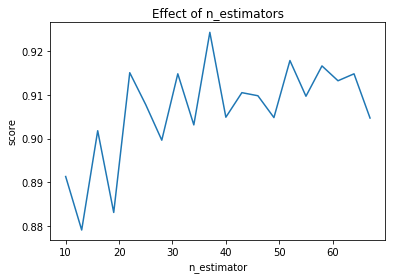

In [14]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 70, 3)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [15]:
scores

[0.8913342689080553,
 0.8791037770293298,
 0.901802935114354,
 0.8831192282479879,
 0.9150755251154302,
 0.9077521579831813,
 0.8996448773810061,
 0.9148225785332876,
 0.9031402816327146,
 0.9243048785118514,
 0.904897957308094,
 0.9105121499117421,
 0.909805594710038,
 0.9048154033407584,
 0.9178582672673973,
 0.9096929040861975,
 0.9166257917022287,
 0.9132332748574978,
 0.9148196922933443,
 0.9047075474099598]

In [ ]:
pred=pd.read_csv("test_values.csv")

In [ ]:
pred.drop(["row_id","county_code","state"], axis=1, inplace=True)
pred.pct_adult_smoking = pred.pct_adult_smoking.fillna(pred.pct_adult_smoking.mean())
pred.pct_low_birthweight = pred.pct_low_birthweight.fillna(pred.pct_low_birthweight.mean())
pred.pct_excessive_drinking = pred.pct_excessive_drinking.fillna(pred.pct_excessive_drinking.mean())
pred.homicides_per_100k = pred.homicides_per_100k.fillna(pred.homicides_per_100k.mean())
pred.motor_vehicle_crash_deaths_per_100k = pred.motor_vehicle_crash_deaths_per_100k.fillna(pred.motor_vehicle_crash_deaths_per_100k.mean())
pred.pop_per_dentist = pred.pop_per_dentist.fillna(pred.pop_per_dentist.mean())
pred.pop_per_primary_care_physician = pred.pop_per_primary_care_physician.fillna(pred.pop_per_primary_care_physician.mean())
columns = ["rucc", "urban_influence", "economic_typology","year"]
pred = pd.get_dummies(pred, columns=columns)
pred.head(10)

In [ ]:
pred=pred.fillna(value=0)
print(pred.shape)

In [ ]:
#scaler.fit(pred)
pred = scaler.transform(pred)

In [ ]:
hello=model_RF.predict(pred)

In [ ]:
print(hello)

In [ ]:
np.savetxt("forest.csv", hello, delimiter=",")

In [16]:
model.set_params(n_estimators=37,min_samples_leaf=2,max_depth=6)

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=37, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [12]:
# Applying Grid Search to find the best model and the best parameters 
from sklearn.grid_search import GridSearchCV

parameters = [{'n_estimators':[30, 40, 50], 'min_samples_split':[5,7,9],'min_samples_leaf':[3,6,9],'max_depth': [3,4,5]},
             {'n_estimators':[35, 45, 55], 'max_depth': [6,7,8], 'min_samples_leaf': [2,4,5]}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,           
                           n_jobs = -1)      

grid_search = grid_search.fit(X_train, y_train)

best_scoring = grid_search.best_score_
rmse_regress = np.sqrt(np.abs(best_scoring))  # In above, I selected the 'mean_squared_error: mse' scoring. 
print(rmse_regress)

best_parameters = grid_search.best_params_
print("best_parameters:",best_parameters)

0.9012097255423419
best_parameters: {'max_depth': 6, 'min_samples_leaf': 2, 'n_estimators': 45}


In [ ]:
print(best_scoring)

In [17]:
import sklearn.metrics as sklm
import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = model.predict(X_test) 
print_metrics(y_test, y_score, 1) 

Mean Square Error      = 425916.6702869931
Root Mean Square Error = 652.6229158457379
Mean Absolute Error    = 329.98328451302393
Median Absolute Error  = 100.14712526499903
R^2                    = 0.889742737532284
Adjusted R^2           = 0.889742737532284


In [12]:
# Fitting the model to the training set
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(n_estimators = 41) 

# Applying Grid Search to find the best model and the best parameters 
from sklearn.grid_search import GridSearchCV

parameters = [{'n_estimators':[30,40,50], 'min_samples_split':[3,9,15],'min_samples_leaf':[3,5,7]},
             {'n_estimators':[41, 42, 43], 'max_depth': [5, 7, 9], 'min_samples_leaf': [2, 8, 4]}]

grid_search = GridSearchCV(estimator = model_RF,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,           
                           n_jobs = -1)      

grid_search = grid_search.fit(X_train, y_train)

best_scoring = grid_search.best_score_
rmse_regress = np.sqrt(np.abs(best_scoring))  # In above, I selected the 'mean_squared_error: mse' scoring. 
print(rmse_regress)

best_parameters = grid_search.best_params_
print("best_parameters:",best_parameters)

0.8966594218549168
best_parameters: {'max_depth': 9, 'min_samples_leaf': 2, 'n_estimators': 41}


In [13]:
model_RF.set_params(max_depth=9,min_samples_leaf=2, n_estimators=41)
model_RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [14]:
import sklearn.metrics as sklm
import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = model_RF.predict(X_test) 
print_metrics(y_test, y_score, 44) 

Mean Square Error      = 264616.78134866274
Root Mean Square Error = 514.4091575279962
Mean Absolute Error    = 151.73318563521394
Median Absolute Error  = 16.088776567407606
R^2                    = 0.8098539334155117
Adjusted R^2           = 0.7984663556117053


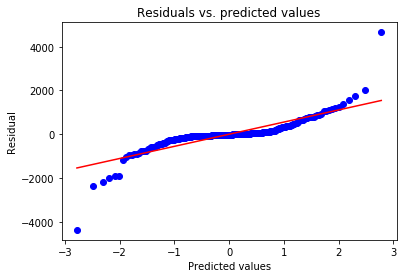

In [18]:
import scipy.stats as ss
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)

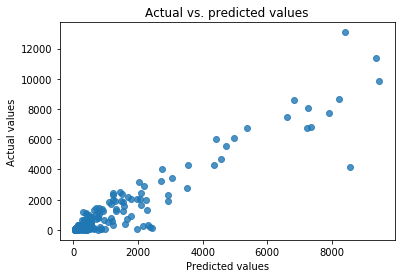

In [19]:
import seaborn as sns
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, y_test, fit_reg=False)
    plt.title('Actual vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')

resid_plot(y_test, y_score) 

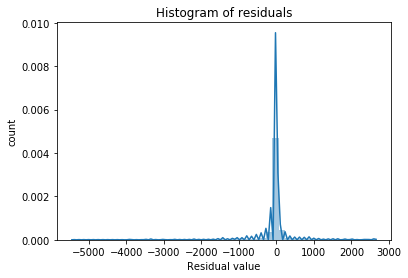

In [20]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score) 